Help Twitter Combat Hate Speech Using NLP and Machine Learning.

Project 2

DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

Tasks: 

    Load the tweets file using read_csv function from Pandas package. 

    Get the tweets into a list for easy text cleanup and manipulation.

    To cleanup: 

        Normalize the casing.

        Using regular expressions, remove user handles. These begin with '@’.

        Using regular expressions, remove URLs.

        Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

        Remove stop words.

        Remove redundant terms like ‘amp’, ‘rt’, etc.

        Remove ‘#’ symbols from the tweet while retaining the term.

    Extra cleanup by removing terms with a length of 1.

    Check out the top terms in the tweets:

        First, get all the tokenized terms into one large list.

        Use the counter and find the 10 most common terms.

    Data formatting for predictive modeling:

        Join the tokens back to form strings. This will be required for the vectorizers.

        Assign x and y.

        Perform train_test_split using sklearn.

    We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

        Import TF-IDF  vectorizer from sklearn.

        Instantiate with a maximum of 5000 terms in your vocabulary.

        Fit and apply on the train set.

        Apply on the test set.

    Model building: Ordinary Logistic Regression

        Instantiate Logistic Regression from sklearn with default parameters.

        Fit into  the train data.

        Make predictions for the train and the test set.

    Model evaluation: Accuracy, recall, and f_1 score.

        Report the accuracy on the train set.

        Report the recall on the train set: decent, high, or low.

        Get the f1 score on the train set.

    Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

        Adjust the appropriate class in the LogisticRegression model.

    Train again with the adjustment and evaluate.

        Train the model on the train set.

        Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

    Regularization and Hyperparameter tuning:

        Import GridSearch and StratifiedKFold because of class imbalance.

        Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

        Use a balanced class weight while instantiating the logistic regression.

    Find the parameters with the best recall in cross-validation.

        Choose ‘recall’ as the metric for scoring.

        Choose a stratified 4 fold cross-validation scheme.

        Fit into  the train set.

    What are the best parameters?

    Predict and evaluate using the best estimator.

        Use the best estimator from the grid search to make predictions on the test set.

        What is the recall on the test set for the toxic comments?

        What is the f_1 score?


In [1]:
import nltk

In [2]:
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re, random, string, os

In [3]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Using TensorFlow backend.
/home/martha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/martha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/martha/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/martha/anaconda3/lib/python3.7/site-packages/tenso

In [4]:
from string import punctuation

In [5]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for same sized plot
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#import warnings
#warnings.filterwarnings(action='ignore', category=FutureWarningabs)

In [6]:
dff=pd.read_csv('../course7/dataset/TwitterHate.csv')

In [7]:
df=dff.copy()


In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:

#to view tweet randomlly 
random=np.random.randint(0,len(df))
print(random)
df.iloc[random]['tweet']

#ask

20155


'america first before all others we should be ashamed of our selves. '

In [12]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [13]:
stopeng = stopwords.words('english')
additional = ['rt', 'amp', "can't", 'u', 'ur']
stopengp=stopeng  + additional + list(punctuation)
#set().union(stopeng, punctuation, additional). can use for loop and append.

In [14]:
stopengp

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
twt=df.tweet.values
len(twt)

31962

In [16]:
#tweetdata=[]
def workit(tw):
    tweetlow=[i.lower() for i in tw]
    tweetnouser=[re.sub('@\w+',' ', i) for i in tweetlow]
    tweetnourl=[re.sub('\w+://\S+', ' ', i) for i in tweetnouser]
    tweetnohash=[re.sub('#|[^A-Za-z]+',' ', i) for i in tweetnourl]
    tweettoken=[i.split() for i in tweetnohash]#word_tokenize(tweet)
    tweet=[t for t in tweettoken if t not in stopengp]
    tweet =[now for now in tweet
                    if not len(now) == 1]
    
    print(tweet)
    
    #tweetdata.append(tweetnow)

In [17]:
#df['twet']=df.tweet.values.map(lambda x: workit(x))
df['twi']=workit(twt)


#If it gives error expecting a string, apply(str), eg say 
#df['tweet']=df['tweet'].apply(str)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#clean up
twtlow=[i.lower() for i in df.tweet.values]
df['tweet']=twtlow 
df.drop('twi', axis=1, inplace=True)

In [19]:
df.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [20]:
tweetnouser=[re.sub('@\w+',' ', i) for i in twtlow]

In [21]:
tweetnouser[:3]

['   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

In [22]:
tweetnourl=[re.sub('\w+://\S+', ' ', i) for i in tweetnouser]

In [23]:
tweetnohash=[re.sub('#|[^A-Za-z]+',' ', i) for i in tweetnourl]

In [24]:
tweettoken=[word_tokenize(i) for i in tweetnohash]

In [25]:
tweettoken[:5]

[['when',
  'a',
  'father',
  'is',
  'dysfunctional',
  'and',
  'is',
  'so',
  'selfish',
  'he',
  'drags',
  'his',
  'kids',
  'into',
  'his',
  'dysfunction',
  'run'],
 ['thanks',
  'for',
  'lyft',
  'credit',
  'i',
  'can',
  't',
  'use',
  'cause',
  'they',
  'don',
  't',
  'offer',
  'wheelchair',
  'vans',
  'in',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'your', 'majesty'],
 ['model',
  'i',
  'love',
  'u',
  'take',
  'with',
  'u',
  'all',
  'the',
  'time',
  'in',
  'ur'],
 ['factsguide', 'society', 'now', 'motivation']]

In [26]:
df['tweet']=tweettoken

In [27]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[model, i, love, u, take, with, u, all, the, t..."
4,0,"[factsguide, society, now, motivation]"


In [28]:
def nostop(text):
    done = [word for word in text if word not in stopengp]
    return done

df['tweet']=df['tweet'].apply(nostop)
df['tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                    [bihday, majesty]
3                            [model, love, take, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [29]:
df['tweet'][14933]

['month',
 'completed',
 'beautiful',
 'relationship',
 'may',
 'always',
 'b',
 'stay',
 'together']

In [30]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [31]:
def remove_short(text):
    lenght=[1]
    text=[word for word in text if not len(word) in lenght]#if len(word) != 1
    return text
    
df['tweet']=df['tweet'].apply(remove_short)
df['tweet'][14933]

['month',
 'completed',
 'beautiful',
 'relationship',
 'may',
 'always',
 'stay',
 'together']

In [32]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


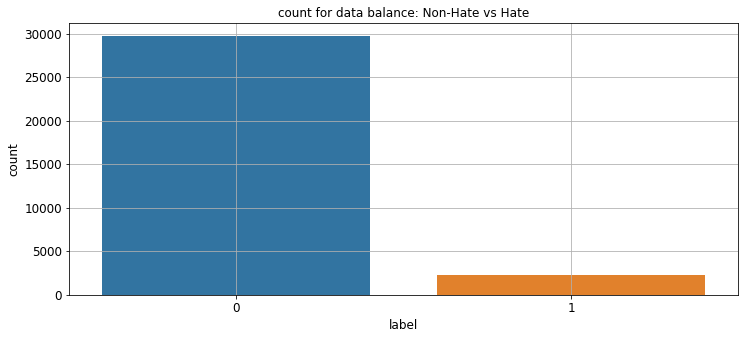

In [33]:
#Exploratory data analysis 
sns.countplot(df['label'])
plt.title('count for data balance: Non-Hate vs Hate')
plt.grid() 
plt.show()

In [34]:
from collections import Counter
results = Counter()
df['tweet'].apply(results.update)
print(results.most_common(10))

[('love', 2828), ('day', 2393), ('happy', 1707), ('like', 1180), ('life', 1176), ('time', 1150), ('today', 1095), ('new', 1003), ('thankful', 952), ('positive', 937)]


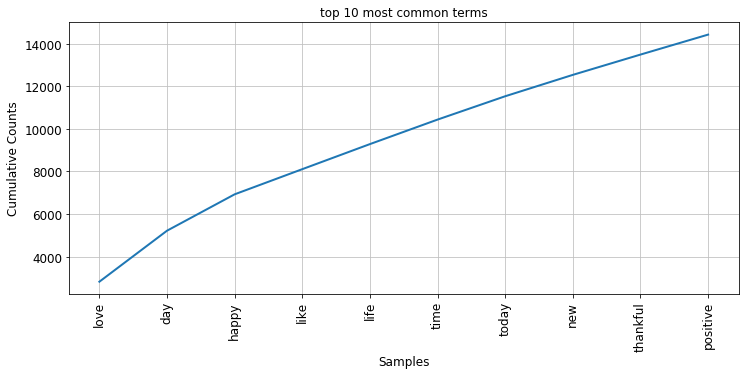

In [35]:
plt.title('top 10 most common terms')
frequency = nltk.FreqDist(results)
frequency.plot(10,cumulative=True)
plt.show()

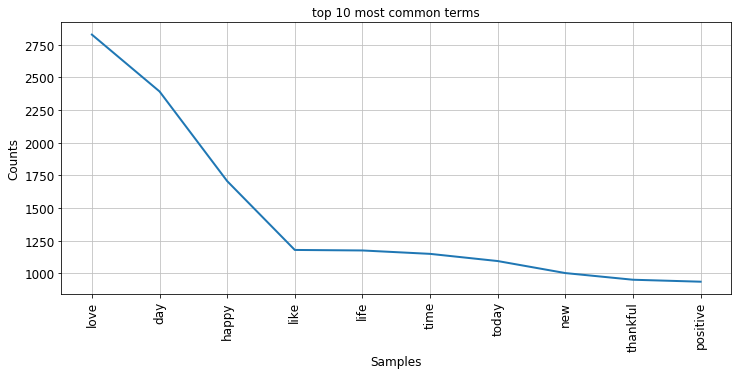

In [36]:
plt.title('top 10 most common terms')
frequency = nltk.FreqDist(results)
frequency.plot(10,cumulative=False)
plt.show()

In [37]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [38]:
df['tweet']=df['tweet'].apply(lambda x: ' '.join(x))
df.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation


In [39]:
X=df['tweet']
y=df['label']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=20, stratify=df['label'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23971,) (7991,) (23971,) (7991,)


In [41]:
import sklearn
sklearn.__version__

'0.22.1'

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfVectorizer(max_features=5000)

In [43]:
X_train=vectorizer.fit_transform(X_train) 
X_test = vectorizer.fit_transform(X_test)


In [44]:
X_train.shape, X_test.shape

((23971, 5000), (7991, 5000))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

clf=LogisticRegression()
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Train accuracy: %.4f' %accuracy_score(y_train, train_pred))
print('Test accuracy: %.4f' %accuracy_score(y_test, test_pred))

Train accuracy: 0.9555
Test accuracy: 0.9283


In [46]:
#since data is imbalanced, accuracy might not be true enough, we look at f1.if f1 is low, the model is poor
print('Classification Report \n')
print(classification_report(y_train, train_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22290
           1       0.95      0.38      0.55      1681

    accuracy                           0.96     23971
   macro avg       0.95      0.69      0.76     23971
weighted avg       0.96      0.96      0.95     23971



In [47]:
print('Classification Report \n')
print(classification_report(y_test, test_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7430
           1       0.00      0.00      0.00       561

    accuracy                           0.93      7991
   macro avg       0.46      0.50      0.48      7991
weighted avg       0.86      0.93      0.90      7991



In [49]:
#using weighted Log Regr or Cost Sensitive Log Regr 

#since ratio of class label 0 to 1 is 13:1 
# we define the weight of the class label using inverse ratio 
weights = {0:1.0, 1:13.0}

#instantiate the log regr model and account for the weights to be applied for model coeffs update magnitude 

clf = LogisticRegression(solver='lbfgs', class_weight = weights) 

clf.fit(X_train, y_train) 
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Classification Report for Training ','\n')
print(classification_report(y_train, train_pred),'\n')
print('Classification Report for Test \n') 
print(classification_report(y_test, test_pred))

Classification Report for Training  

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     22290
           1       0.61      0.98      0.75      1681

    accuracy                           0.95     23971
   macro avg       0.80      0.97      0.86     23971
weighted avg       0.97      0.95      0.96     23971
 

Classification Report for Test 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7430
           1       0.09      0.17      0.11       561

    accuracy                           0.82      7991
   macro avg       0.51      0.52      0.51      7991
weighted avg       0.87      0.82      0.84      7991



In [50]:
#we can try another model or add synthetic data to imbalanced data to get even better result

In [51]:
#Regularization and Hyperparameter tuning 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [53]:
#def search space
from scipy.stats import loguniform
space =dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1','l2', 'elasticnet'] 
space['C'] = loguniform(1e-5, 100)

In [54]:
space

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f9f1fa968d0>}

In [55]:
# fine tune model with balanced class weight


#def model with balnce class weights 
weight={0:1.0, 1:1.0}
clf = LogisticRegression(class_weight=weight)
folds= StratifiedKFold(n_splits=4, random_state=40)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions=space, n_iter=100, 
                                 scoring='recall', n_jobs=-1, cv=folds, random_state=40)
grid_result=  grid_search.fit(X_train, y_train)

/home/martha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [56]:
grid_result.best_estimator_

LogisticRegression(C=18.44948435745568, class_weight={0: 1.0, 1: 1.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [57]:
#instantiate the best model
clf = LogisticRegression(C=18.44948435745568, class_weight={0: 1.0, 1: 1.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)


clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Classification Report for Training ','\n')
print(classification_report(y_train, train_pred),'\n')
print('Classification Report for Test \n') 
print(classification_report(y_test, test_pred))

Classification Report for Training  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22290
           1       0.98      0.93      0.96      1681

    accuracy                           0.99     23971
   macro avg       0.99      0.96      0.98     23971
weighted avg       0.99      0.99      0.99     23971
 

Classification Report for Test 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7430
           1       0.08      0.12      0.10       561

    accuracy                           0.85      7991
   macro avg       0.51      0.51      0.51      7991
weighted avg       0.87      0.85      0.86      7991



In [58]:
# fine tune model with class weightys proportional to the class imbalance 


#use the class weights to handle the imbalance in the label 
weights = {0:1.0, 1:13.0}
clf=LogisticRegression(class_weight=weights) 
folds=StratifiedKFold(n_splits=4, random_state=40)

grid_search=RandomizedSearchCV(estimator=clf, param_distributions=space, n_iter=100, 
                               scoring='recall', n_jobs=-1, cv=folds, random_state=40)
grid_result = grid_search.fit(X_train, y_train)

grid_result.best_estimator_

/home/martha/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression(C=0.23592457102273912, class_weight={0: 1.0, 1: 13.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [59]:
#instantiate best model 
clf=LogisticRegression(C=0.23592457102273912, class_weight={0: 1.0, 1: 13.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)


clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred= clf.predict(X_test)

print('Classification Report for Training ','\n')
print(classification_report(y_train, train_pred),'\n')
print('Classification Report for Test \n') 
print(classification_report(y_test, test_pred))

Classification Report for Training  

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     22290
           1       0.55      0.95      0.70      1681

    accuracy                           0.94     23971
   macro avg       0.77      0.94      0.83     23971
weighted avg       0.96      0.94      0.95     23971
 

Classification Report for Test 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7430
           1       0.08      0.16      0.11       561

    accuracy                           0.82      7991
   macro avg       0.51      0.51      0.50      7991
weighted avg       0.87      0.82      0.84      7991



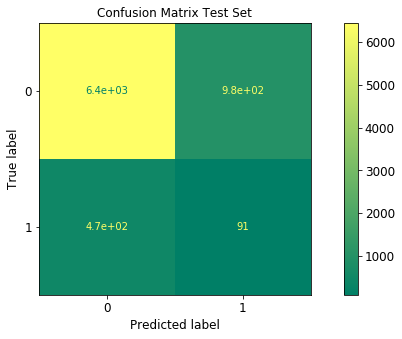

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='summer')
plt.title('Confusion Matrix Test Set') 
plt.show()

In [ ]:
#ROUGH

In [ ]:
#Removing diacritics 
def simplify(text):
    import unicodedata
    try:
        text = unicodedatade(text, 'utf-8')
    except NameError
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').defecode('utf-8')
    return str(text)


df['tweet'] = df['tweet'].apply(simplify)

In [ ]:
#we can also tokenize using tweettokenizer 

tokenizer = TweetTokenizer(preserve_case=True)
#tokenizer.tokenize('emy whey are coming to wonder:- ')#on sentence or
df['tweet']=df['tweet'].apply(tokenizer.tokenize) 

In [153]:
ff=df['tweet'][22946]

In [161]:
ff

"so cool to find sales on my bihday week ð\x9f\x8e\x82ð\x9f\x8e\x89 i didn't exactly splurge and got some things that i actually needed. yay!! #bihdayweek  "

In [162]:
x=re.sub('@\w+',' ', ff) 
x

"so cool to find sales on my bihday week ð\x9f\x8e\x82ð\x9f\x8e\x89 i didn't exactly splurge and got some things that i actually needed. yay!! #bihdayweek  "

In [232]:
t=re.sub('\w+://\S+', ' ', x)
t 

"so cool to find sales on my bihday week ð\x9f\x8e\x82ð\x9f\x8e\x89 i didn't exactly splurge and got some things that i actually needed. yay!! #bihdayweek  "

In [233]:
y=re.sub('#|[^A-Za-z]+ ','', t)
y

"so cool to find sales on my bihday weeki didn't exactly splurge and got some things that i actually neededyaybihdayweek"

In [258]:
z=y.split( )#word_tokenize(y)
z

['so',
 'cool',
 'to',
 'find',
 'sales',
 'on',
 'my',
 'bihday',
 'weeki',
 "didn't",
 'exactly',
 'splurge',
 'and',
 'got',
 'some',
 'things',
 'that',
 'i',
 'actually',
 'neededyaybihdayweek']

In [254]:
n[0]

'cool'

In [125]:
#Spelling corrections 
from textblob import TextBlob 
eg = 'litle wnnder you are so kiind'
egc = TextBlob(eg)
correct=egc.correct()
print(correct)


def spell_check(text):
    txtblob=TextBlob(text)
    corr_text=txtblob.correct() 
    return corr_text

little wonder you are so kind


In [177]:
nltk.download('words')

[nltk_data] Downloading package words to /home/martha/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [179]:
words=set(nltk.corpus.words.words())